In [1]:
import numpy as np
import pandas as pd
import nltk

np.random.seed(5)

books_df = pd.read_csv('selfhelp1.csv')
print("Number of books loaded: %s" %len(books_df))
books_df

Number of books loaded: 15


,Rank,Name of the book,Summary
0,0,How to Stop Worrying and Start Living,Our main business is not to see what lies diml...
1,1,A Mind for Numbers,Lesson 1: Learn the skills of focused thinking...
2,2,Atomic Habits,Changes that seem small and unimportant at fir...
3,3,How to Win Friends and Influence People,The only way to get the best out of an argumen...
4,4,Think and Grow Rich,"All achievement, all earned riches, have their..."
5,5,Deep Work,Deep work has a high value in this age of shal...
6,6,The Secret,The Law of Attraction is a law of nature. It i...
7,7,How to Become a Straight A Student,I�m 99% sure you already know this and you�ve ...
8,8,Self Compassion,Self-compassion entails being warm and underst...
9,9,5 AM Club,Own your morning. Elevate your life.Rising ear...


In [2]:
print(books_df)

    Rank                         Name of the book  \
0      0    How to Stop Worrying and Start Living   
1      1                       A Mind for Numbers   
2      2                            Atomic Habits   
3      3  How to Win Friends and Influence People   
4      4                      Think and Grow Rich   
5      5                                Deep Work   
6      6                               The Secret   
7      7       How to Become a Straight A Student   
8      8                          Self Compassion   
9      9                                5 AM Club   
10    10                       The Power of Habit   
11    11                                Pollyanna   
12    12  Seven Habits of Highly Effective People   
13    13                    Attitude is everyting   
14    14                    How to talk to anyone   

                                              Summary  
0   Our main business is not to see what lies diml...  
1   Lesson 1: Learn the skills of focus

In [4]:
sent_tokenized = [sent for sent in nltk.sent_tokenize("""Three phases: 5-5:20 is all about exercise, 5:20-5:40- Meditate and write your journal, 5:40-6:00 read a book or just learn. Make sure you are still sleeping for six to eight hours. Lot of consistency is needed to make this habit automatic.""")]
words_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]
words_tokenized

import re
filtered = [word for word in words_tokenized if re.search('[a-zA-Z0-9-]', word)]
filtered

['Three',
 'phases',
 '5-5:20',
 'is',
 'all',
 'about',
 'exercise',
 '5:20-5:40-',
 'Meditate',
 'and',
 'write',
 'your',
 'journal',
 '5:40-6:00',
 'read',
 'a',
 'book',
 'or',
 'just',
 'learn']

In [5]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
stemmed_words = [stemmer.stem(word) for word in filtered]
stemmed_words

['three',
 'phase',
 '5-5:20',
 'is',
 'all',
 'about',
 'exercis',
 '5:20-5:40-',
 'medit',
 'and',
 'write',
 'your',
 'journal',
 '5:40-6:00',
 'read',
 'a',
 'book',
 'or',
 'just',
 'learn']

In [6]:
#defining a function for tokenization and stemming
def tokenize_and_stem(text):
    tokens=[word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = [word for word in tokens if(re.search('[a-zA-Z]', word))]
    stems = [stemmer.stem(word) for word in filtered_tokens]
    return stems

In [22]:
#import tfidf and create tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

In [23]:
tfidf_matrix = tfidf_vectorizer.fit_transform(books_df['Summary'].values.astype('U'))

print(tfidf_matrix.shape)

(15, 123)


C:\Users\vatsa\anaconda3\envs\TF_env\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [24]:
# Importing k-means to perform clusters
from sklearn.cluster import KMeans

# Creating a KMeans object with 5 clusters and save as km
km = KMeans(n_clusters=5)

# Fitting the k-means object with tfidf_matrix
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

# Creating a column cluster to denote the generated cluster for each movie
books_df["cluster"] = clusters

# Displaying number of films per cluster (clusters from 0 to 4)
books_df['cluster'].value_counts() 

1    5
2    4
0    3
3    2
4    1
Name: cluster, dtype: int64

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

similarity_distance = 1 - cosine_similarity(tfidf_matrix)

Z=linkage(similarity_distance)

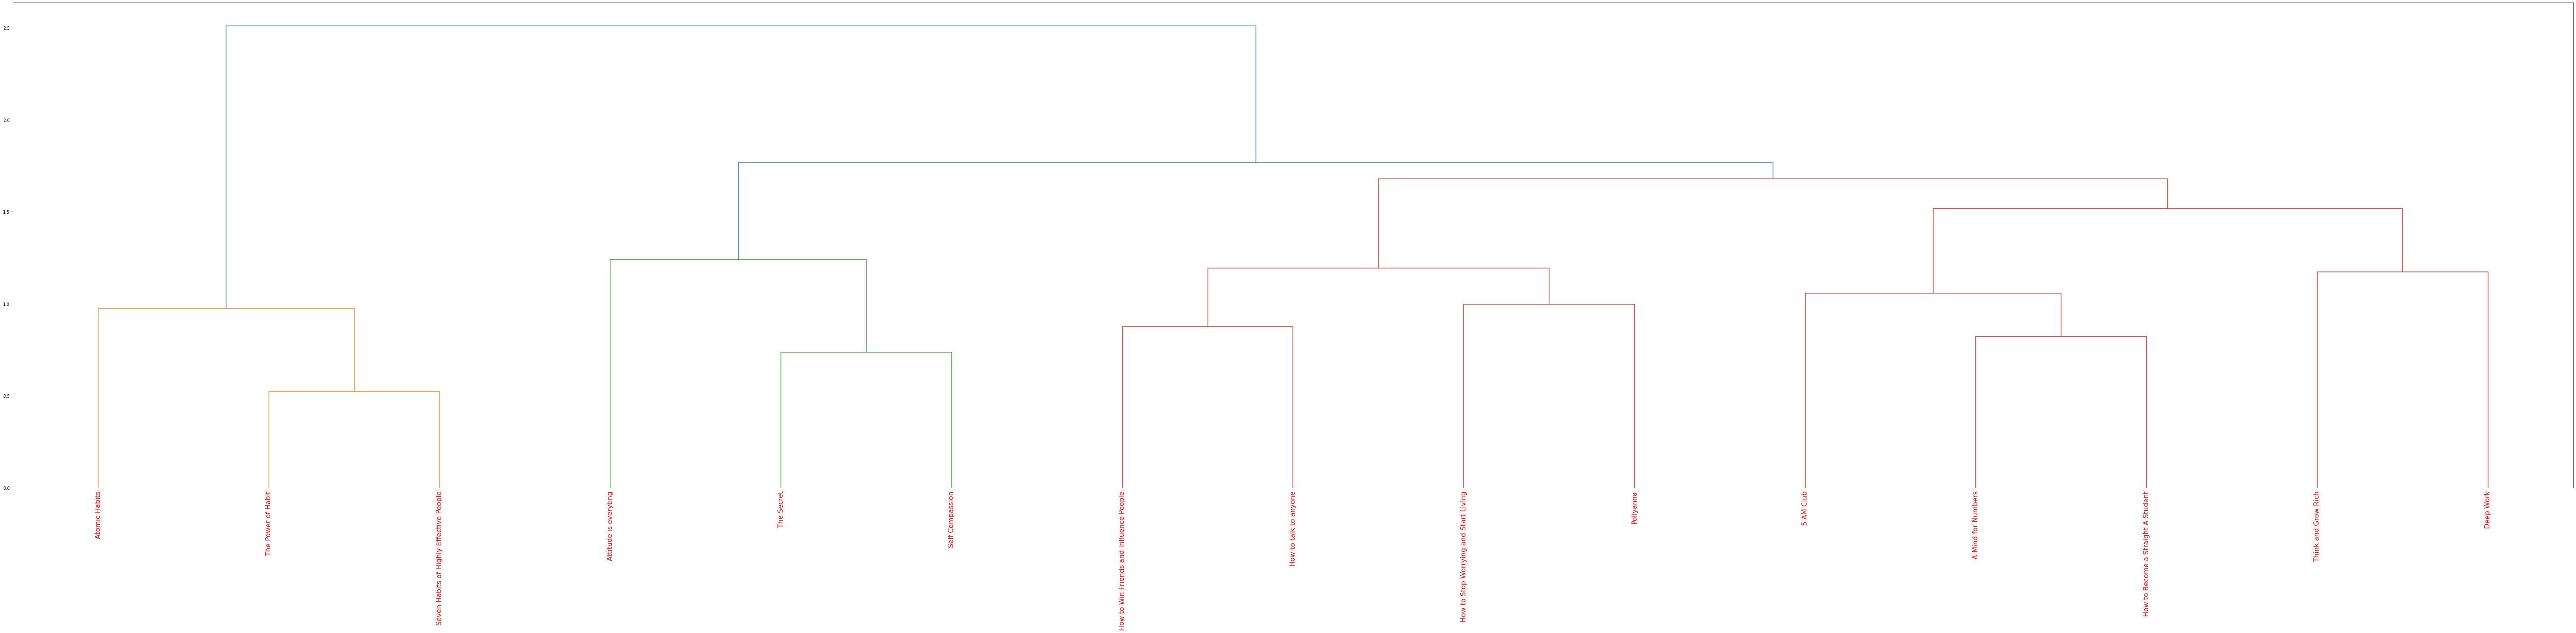

In [26]:
# Import cosine_similarity to calculate similarity of movie plots
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

# Import matplotlib.pyplot for plotting graphs
import matplotlib.pyplot as plt

# Configure matplotlib to display the output inline
%matplotlib inline

# Import modules necessary to plot dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

# Create mergings matrix 
mergings = linkage(similarity_distance, method='ward', metric='euclidean', optimal_ordering=False)

# Plot the dendrogram, using title as label column
dendrogram_ = dendrogram(mergings,
               labels=[x for x in books_df["Name of the book"]],
               leaf_rotation=90,
               leaf_font_size=16,
)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

# Show the plotted dendrogram
plt.show()